In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the stacked geotiff and read it into a 3-D Array
src = rasterio.open('../depth_dDEMs/clpx/corrected/clpx_depth_stack.tif')
arr = src.read()

In [3]:
profile = src.profile
profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 13750, 'height': 11100, 'count': 6, 'crs': CRS({'init': 'epsg:32606'}), 'transform': Affine(1.0, 0.0, 401900.0,
       0.0, -1.0, 7620200.0), 'tiled': False, 'interleave': 'pixel'}

In [22]:
arr_nanmean = np.nanmean(arr, axis=0)
print(arr_nanmean.shape)
print(np.nanmean(arr_nanmean))

(11100, 13750)
0.311571


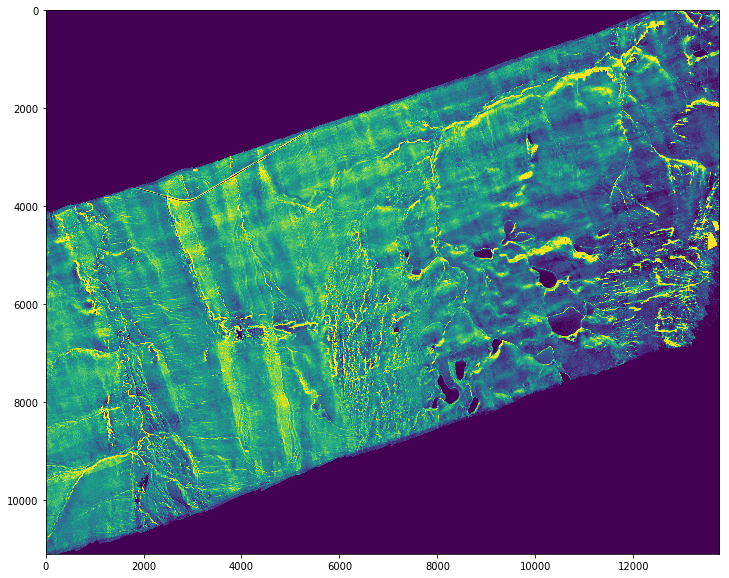

In [23]:
plt.figure(figsize=(16,10))
plt.imshow(arr_nanmean, vmin=0,vmax=1)

In [26]:
arr_nanstd = np.nanstd(arr, axis=0)
print(arr_nanstd.shape)
print(np.nanmean(arr_nanstd))

(11100, 13750)
0.100912


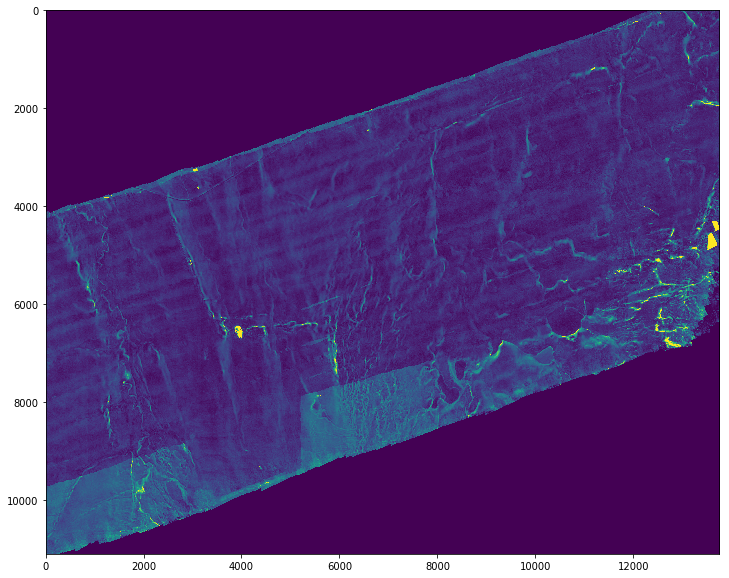

In [27]:
plt.figure(figsize=(16,10))
plt.imshow(arr_nanstd, vmin=0,vmax=1)

In [25]:
np.nanmean(test_arr, axis=0)

array([[  9. ,  14.5,  11. ],
       [  7.5,  13. ,  14. ],
       [ 15. ,  16. ,  17. ]])

In [38]:
profile2 = profile.copy()
profile2['count'] = 1
profile2

{'affine': Affine(1.0, 0.0, 401900.0,
       0.0, -1.0, 7620200.0),
 'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11100,
 'interleave': 'pixel',
 'nodata': -9999.0,
 'tiled': False,
 'transform': (401900.0, 1.0, 0.0, 7620200.0, 0.0, -1.0),
 'width': 13750}

In [40]:
with rasterio.open('../depth_dDEMs/clpx/corrected/clpx_depth_stack_mean.tif', 'w', **profile2) as dst:
        dst.write(arr_nanmean, 1)

/home/cparr/apps/miniconda3/envs/data-scratchbook/lib/python3.5/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [41]:
with rasterio.open('../depth_dDEMs/clpx/corrected/clpx_depth_stack_sd.tif', 'w', **profile2) as dst:
        dst.write(arr_nanstd, 1)

/home/cparr/apps/miniconda3/envs/data-scratchbook/lib/python3.5/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
